### [필요한 라이브러리 모음]

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

## 1. 데이터 불러오기

In [2]:
# 데이터를 불러올 패스를 정해줌
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

# 데이터 불러오기
train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

print('train data dim : {}'.format(train.shape))
print('sub data dim : {}'.format(test.shape))

print('얍💢💢💢')

train data dim : (15035, 21)
sub data dim : (6468, 20)
얍💢💢💢


In [3]:
# 불러온 데이터 모습 살피기
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


### [데이터 상세 속성 정리]

1. ID : 집을 구분하는 번호
2. date : 집을 구매한 날짜
3. price : 타겟 변수인 집의 가격
4. bedrooms : 침실의 수
5. bathrooms : 침실당 화장실 개수
6. sqft_living : 주거 공간의 평방 피트
7. sqft_lot : 부지의 평방 피트
8. floors : 집의 층 수
9. waterfront : 리버뷰
10. view : 집이 얼마나 좋아 보이는지의 정도
11. condition : 집의 전반적인 상태
12. grade : King County grading 시스템 기준으로 매긴 집의 등급
13. sqft_above : 지하실을 제외한 평방 피트
14. sqft_basement : 지하실의 평방 피트
15. yr_built : 집을 지은 년도
16. yr_renovated : 집을 수리한 년도
17. zipcode : 우편번호
18. lat : 위도
19. long : 경도
20. sqft_living15 : 2015년 기준 주거 공간의 평방 피트(집을 재건축했다면, 변화가 있을 수 있음)
21. sqft_lot15 : 2015년 기준 부지의 평방 피트(집을 재건축했다면, 변화가 있을 수 있음)

In [4]:
# Target 데이터인 price속성을 y값으로 저장한다.
y = train['price']

#  Train 데이터에서 Target 데이터 삭제한다.
del train['price']

print(train.columns)
print(train.dtypes)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [5]:
# 향후 데이터 정제시 편리하도록 train 데이터와 test데이터를 합쳤었으나
# 데이터를 합치면 추후 모델 훈련시 y값의 부족으로 문제가 생길수 있음
# 따로따로 데이터 정제시 따로따로 처리해주는 것이 나음

# 두 데이터프레임 결합
# data = pd.concat([train, test], ignore_index=True)

# 결합된 데이터 확인
# print(data.shape)


## 2. 데이터 탐색 - EDA

### 결측치 확인

id : 0
date : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0
id : 0
date : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


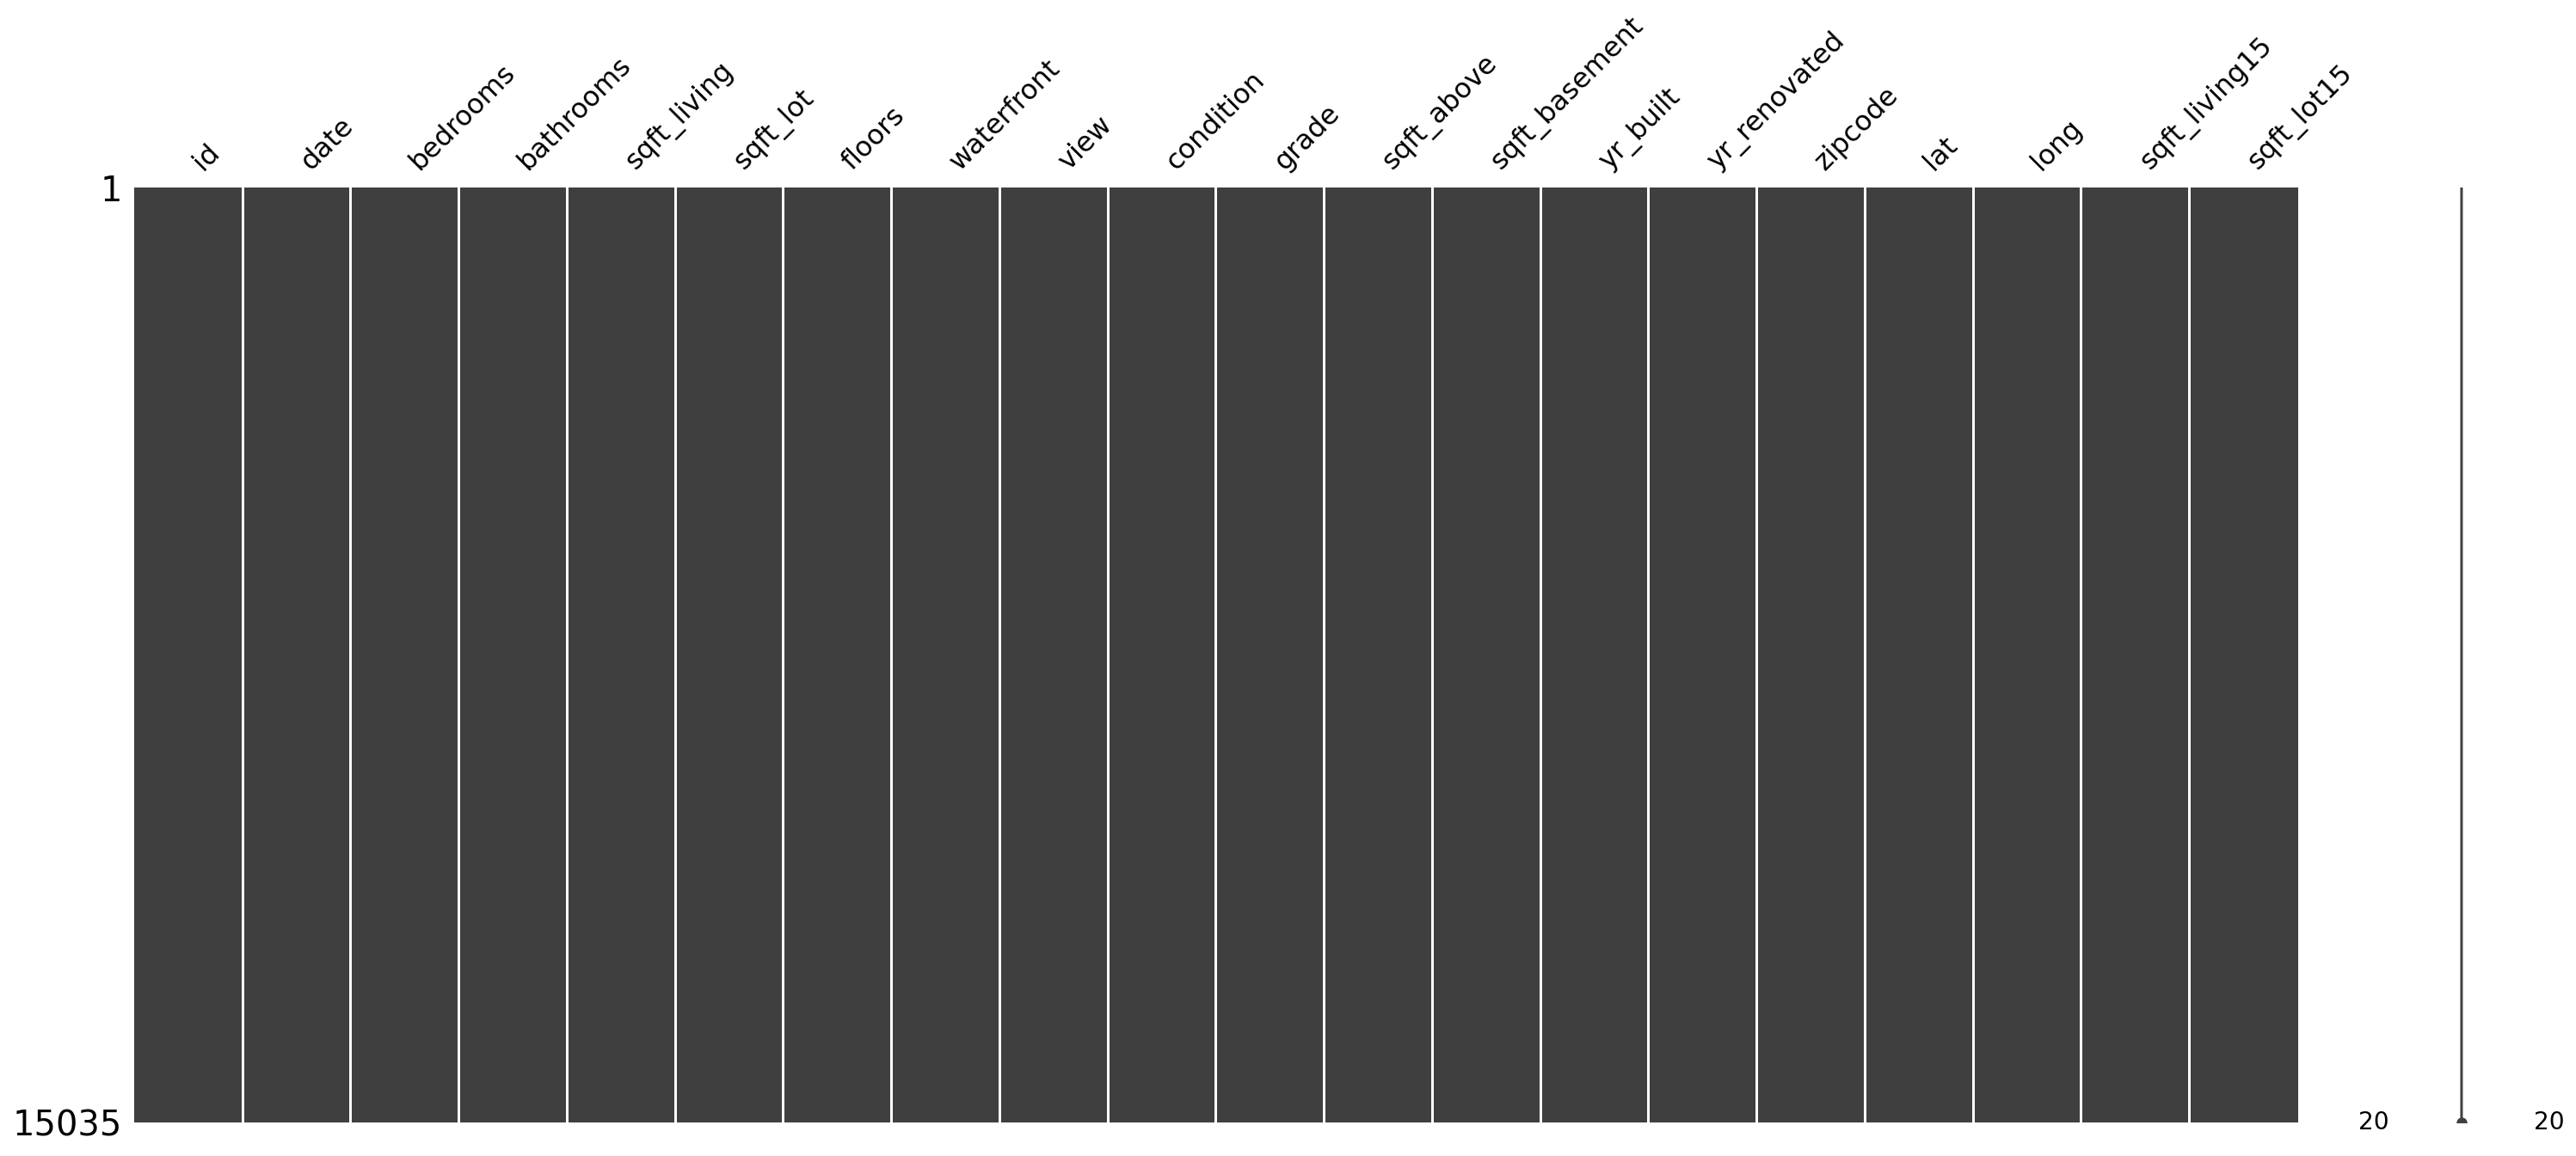

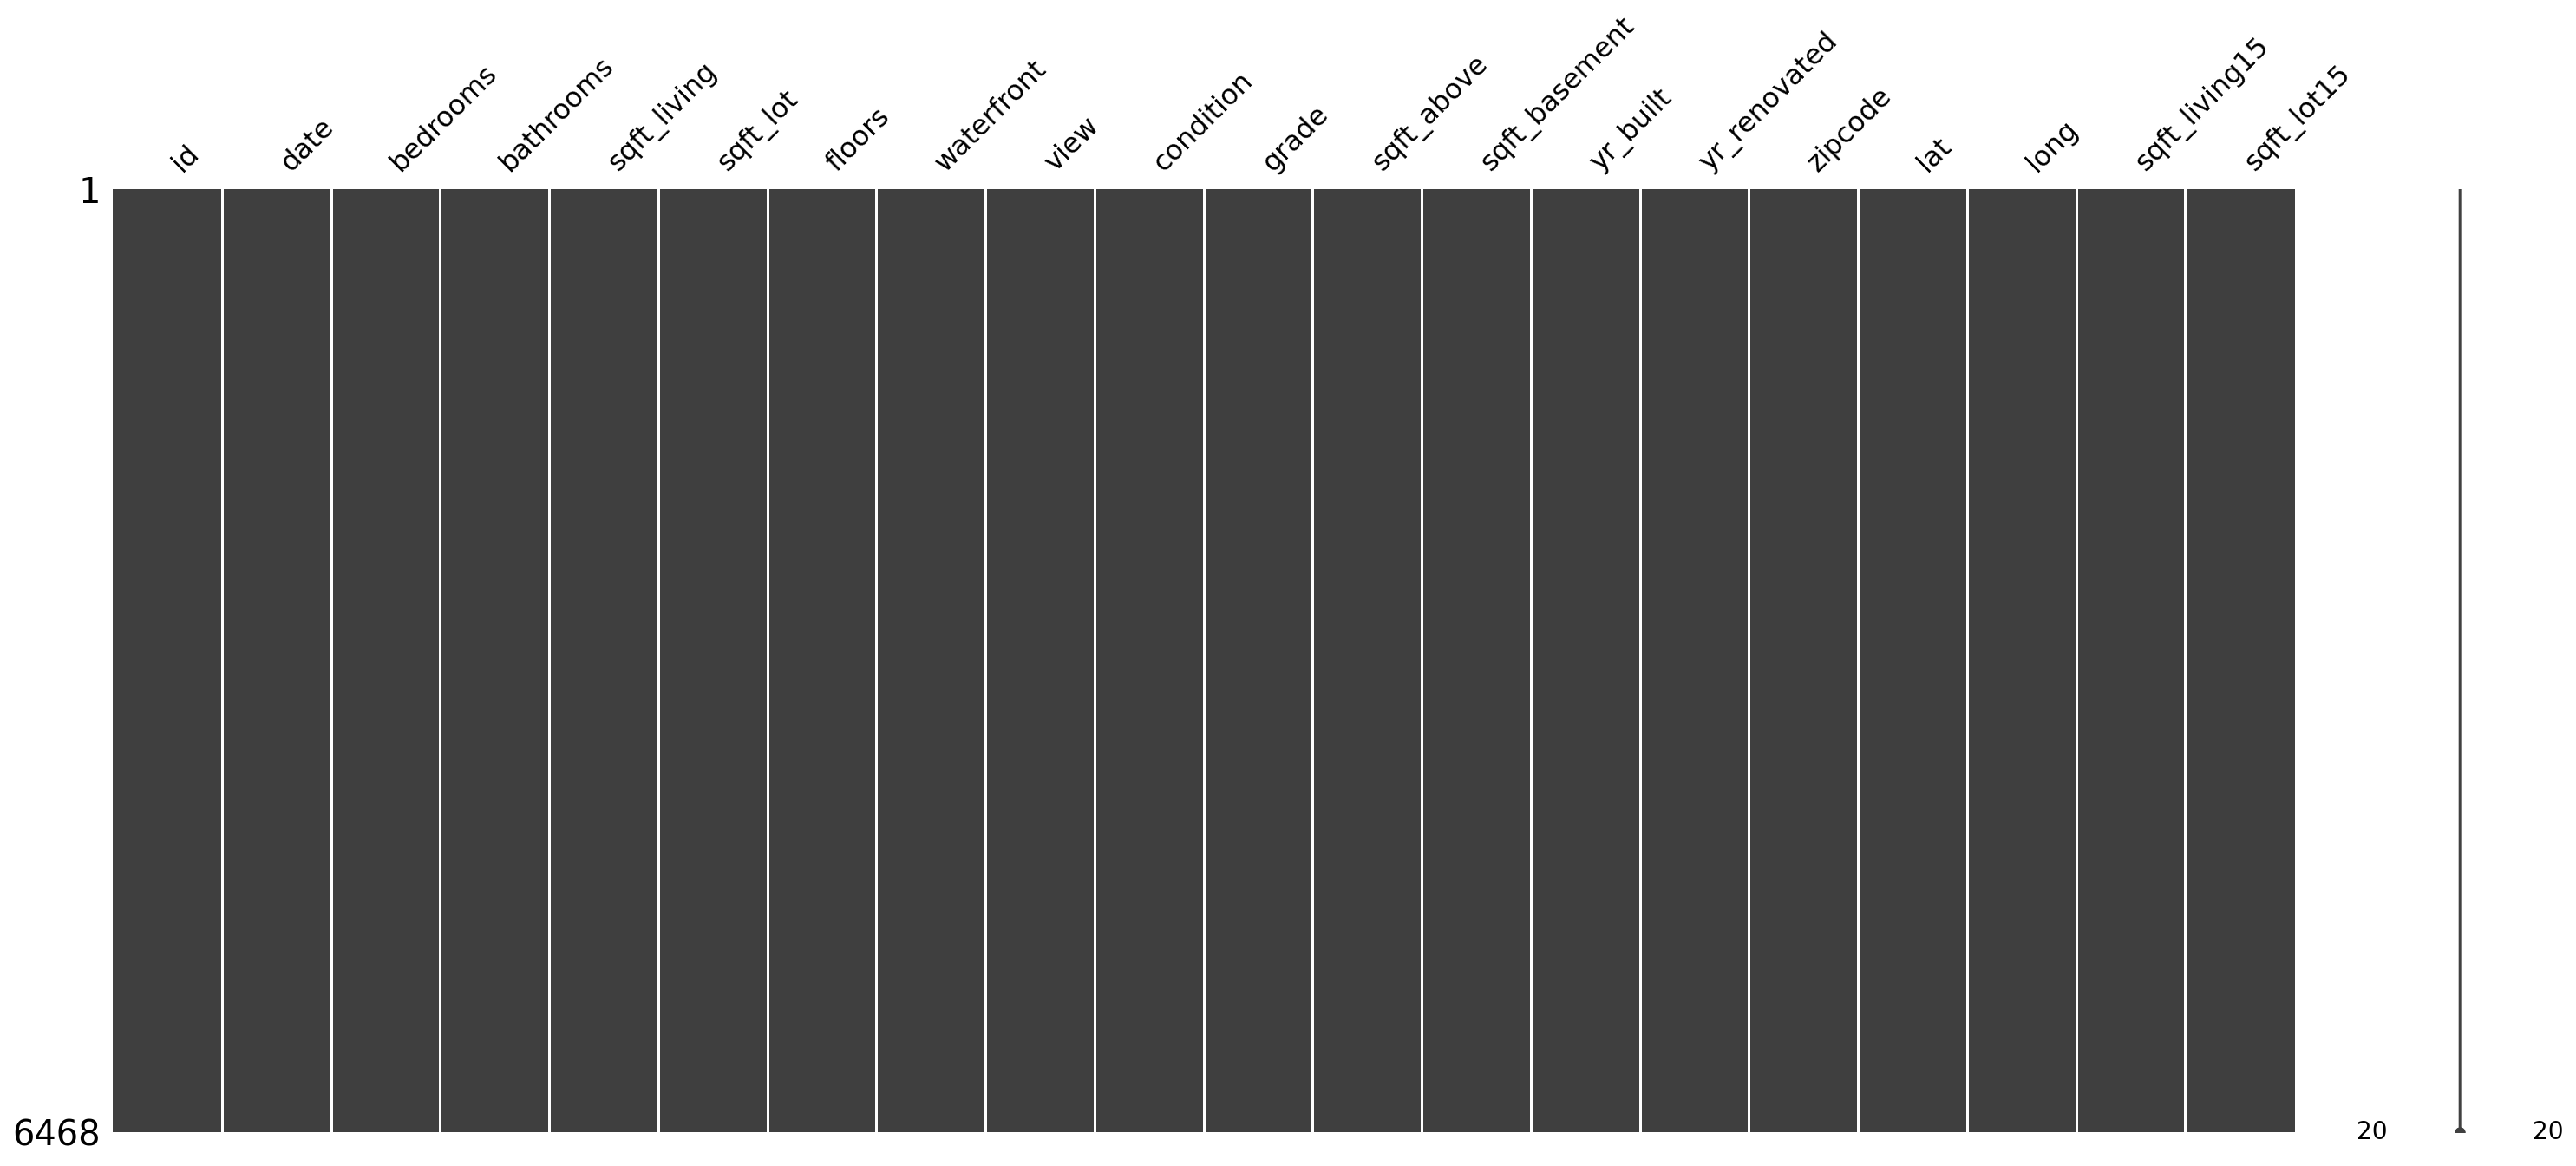

In [6]:
# 전체 속성들의 결측치 여부 확인
# train 데이터 그래프 통한 확인
msno.matrix(train)

#각 속석별 결측치 카운트
for c in train.columns:
    print('{} : {}'.format(c, len(train.loc[pd.isnull(train[c]), c].values)))
    

# test 데이터 그래프 통한 확인
msno.matrix(test)

#각 속석별 결측치 카운트
for c in test.columns:
    print('{} : {}'.format(c, len(test.loc[pd.isnull(test[c]), c].values)))

### 데이터 분포 확인

In [7]:
# 에러 1. 전체항목별 분포 확인 에러로 인해, Date별수를 6자리로 변경하고 해결
# date변수 변경
#data['date'] = data['date'].apply(lambda i: i[:6]).astype(int)
#data.head()

# Train data의 date변수 변경
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [8]:
# Test data의 date변수 변경
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)
test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,201412,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,201412,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,201405,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,201504,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,201503,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


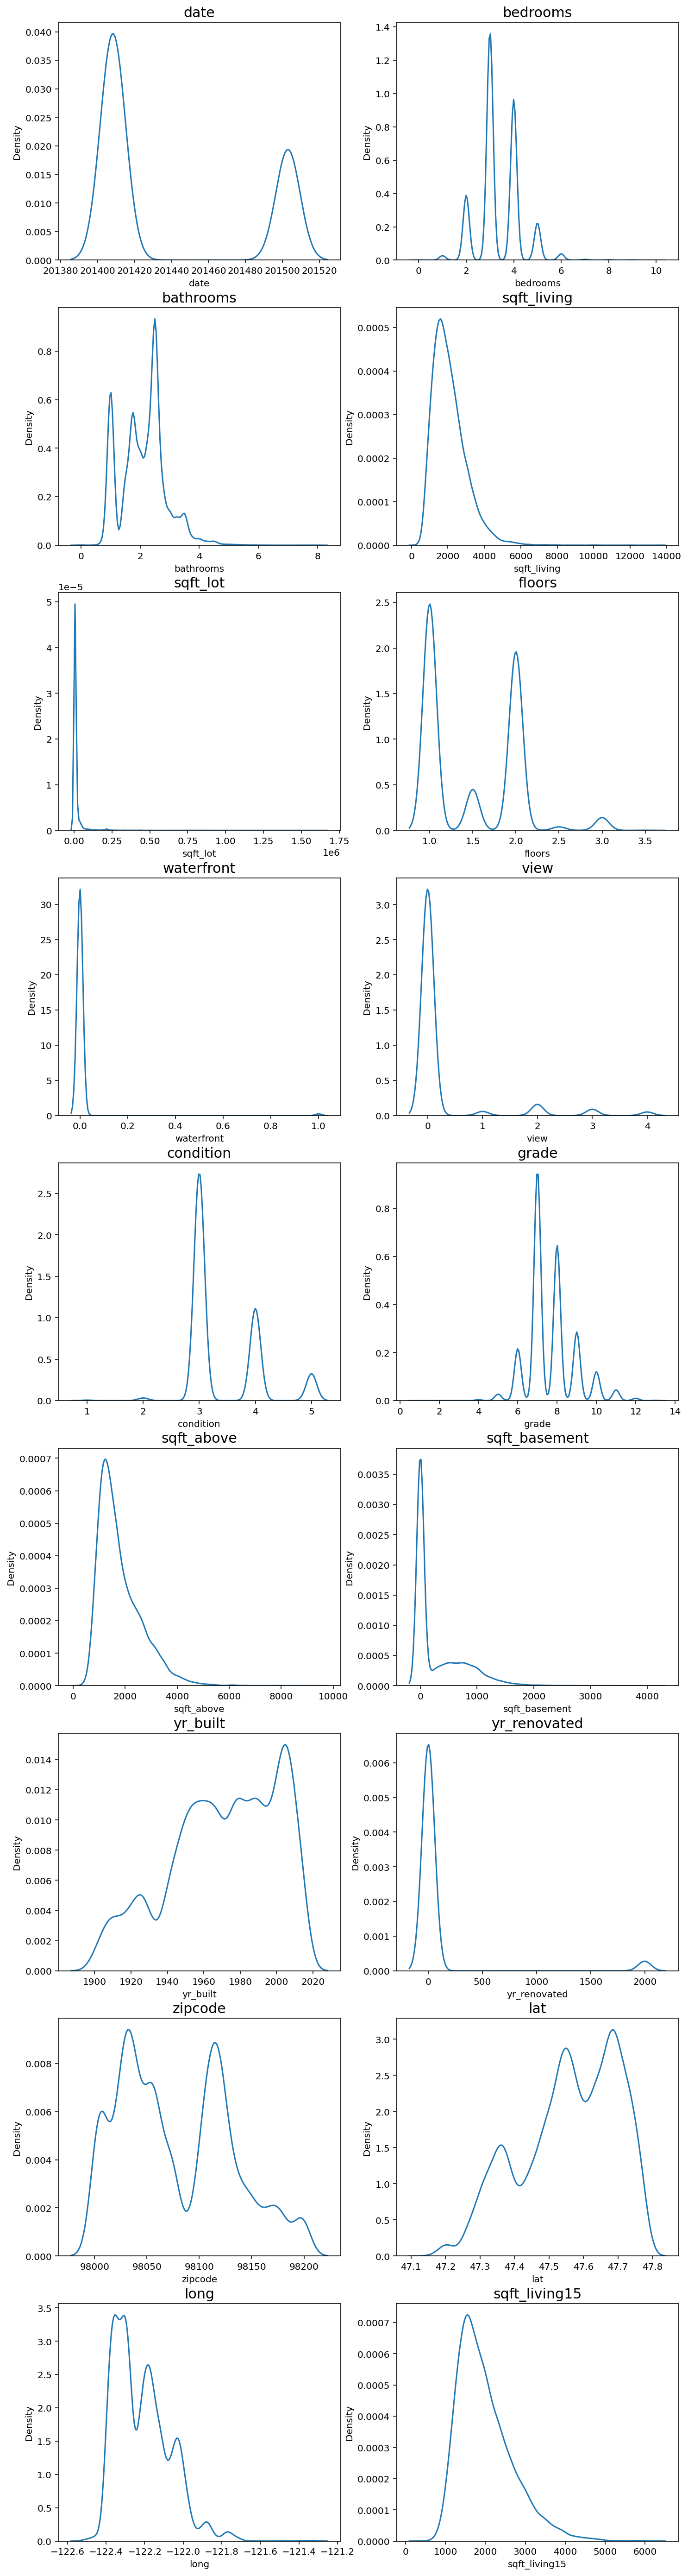

In [9]:
# Train 항목별 분포 그래프
fig, ax = plt.subplots(9, 2, figsize=(12, 50))

# id 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
count = 1
columns = train.columns

for row in range(9):
    for col in range(2):
        sns.kdeplot(data=train[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

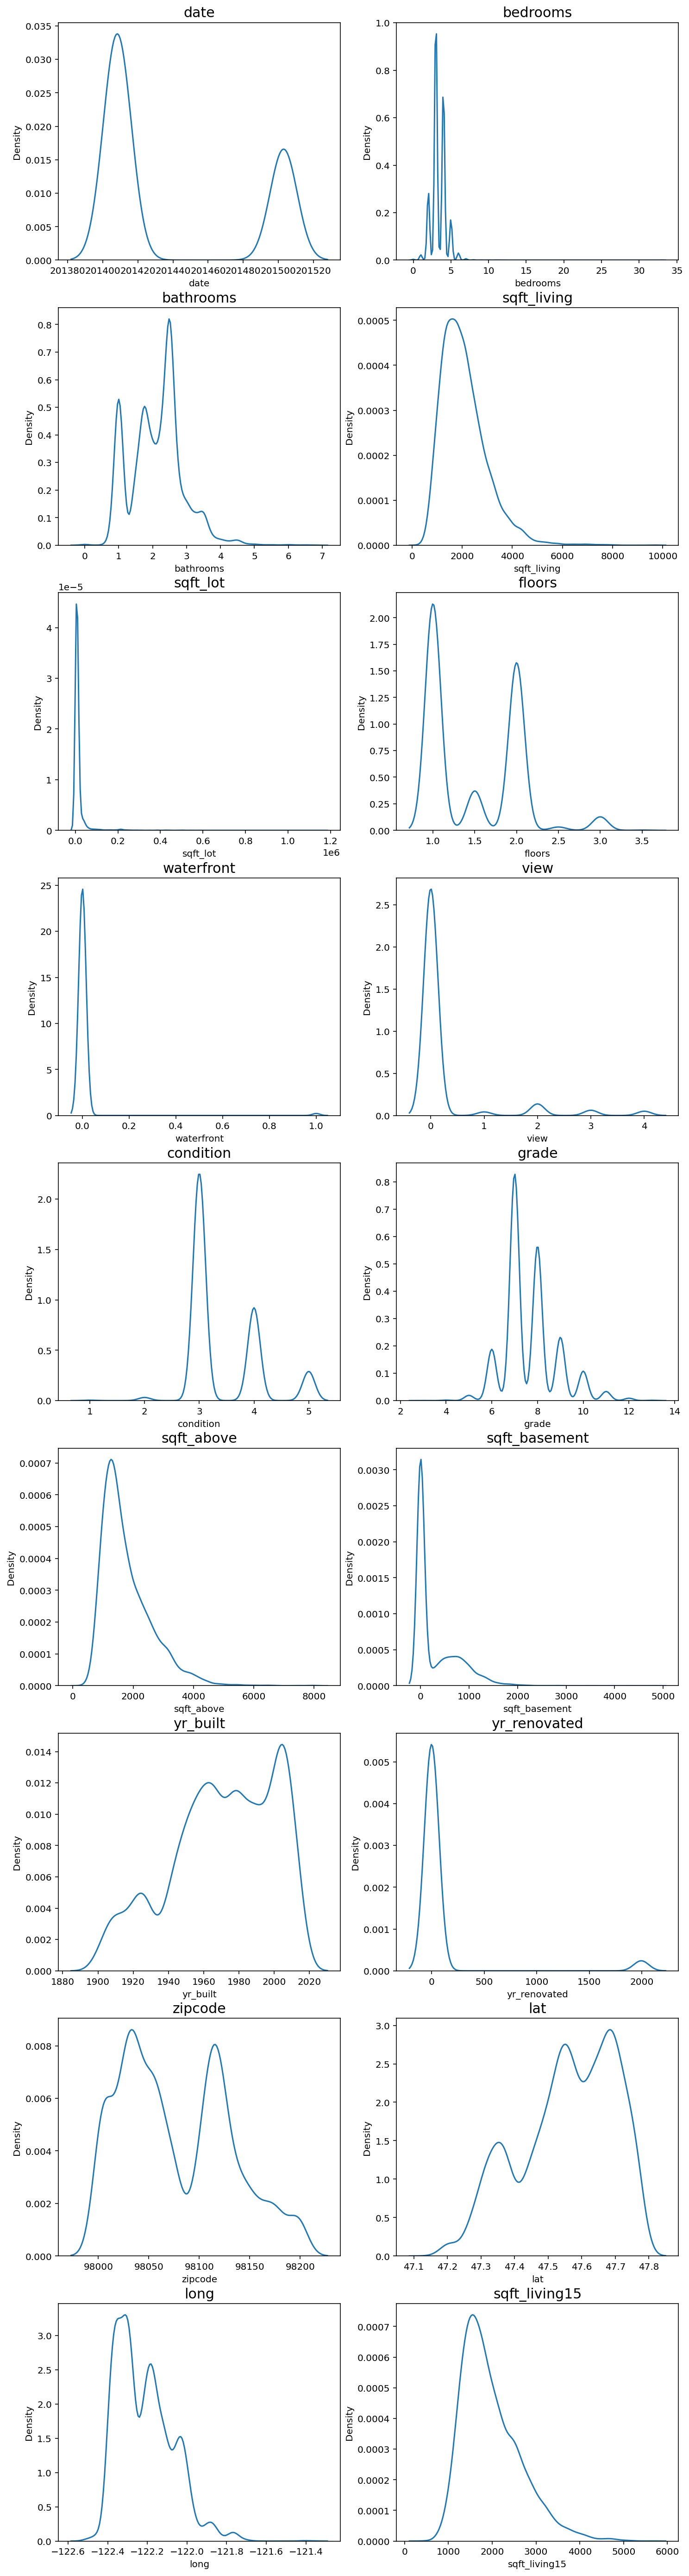

In [10]:
# Test 항목별 분포 그래프
fig, ax = plt.subplots(9, 2, figsize=(12, 50))

# id 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
count = 1
columns = test.columns

for row in range(9):
    for col in range(2):
        sns.kdeplot(data=test[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

In [11]:
# 데이터 분포가 한쪽으로 치우친 속성들에 대해 log함수를 씌워 정규분포화함
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    train[c] = np.log1p(train[c].values)
    test[c] = np.log1p(test[c].values)
    

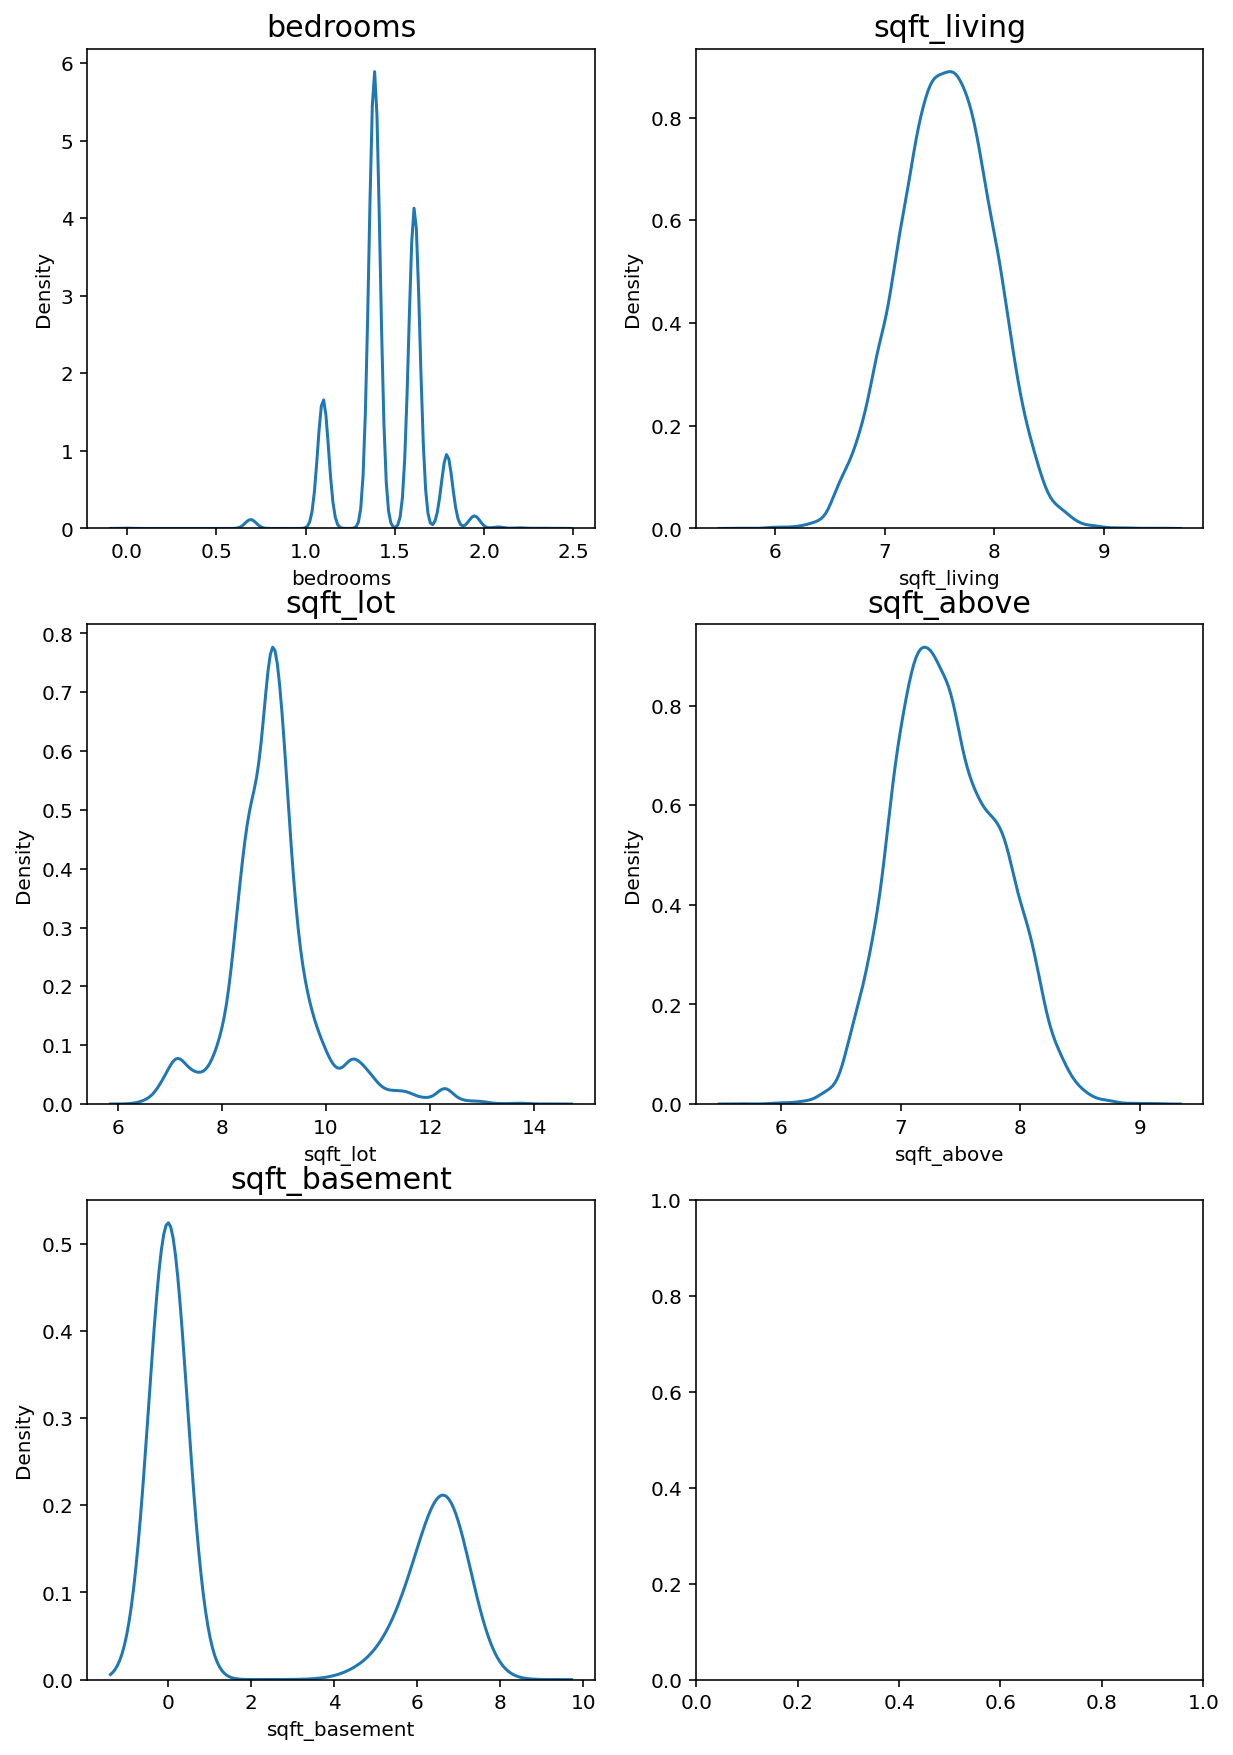

In [12]:
# Train 한쪽으로 치우쳤던 속성들에 대해서만 그래프로 분포 재확인
# 분포모양이 중앙을 집중으로 재분포됨

fig, ax = plt.subplots(3, 2, figsize=(10, 15))

count = 0
for row in range(3):
    for col in range(2):        
        sns.kdeplot(data=train[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count+=1
        if count == 5:
            break


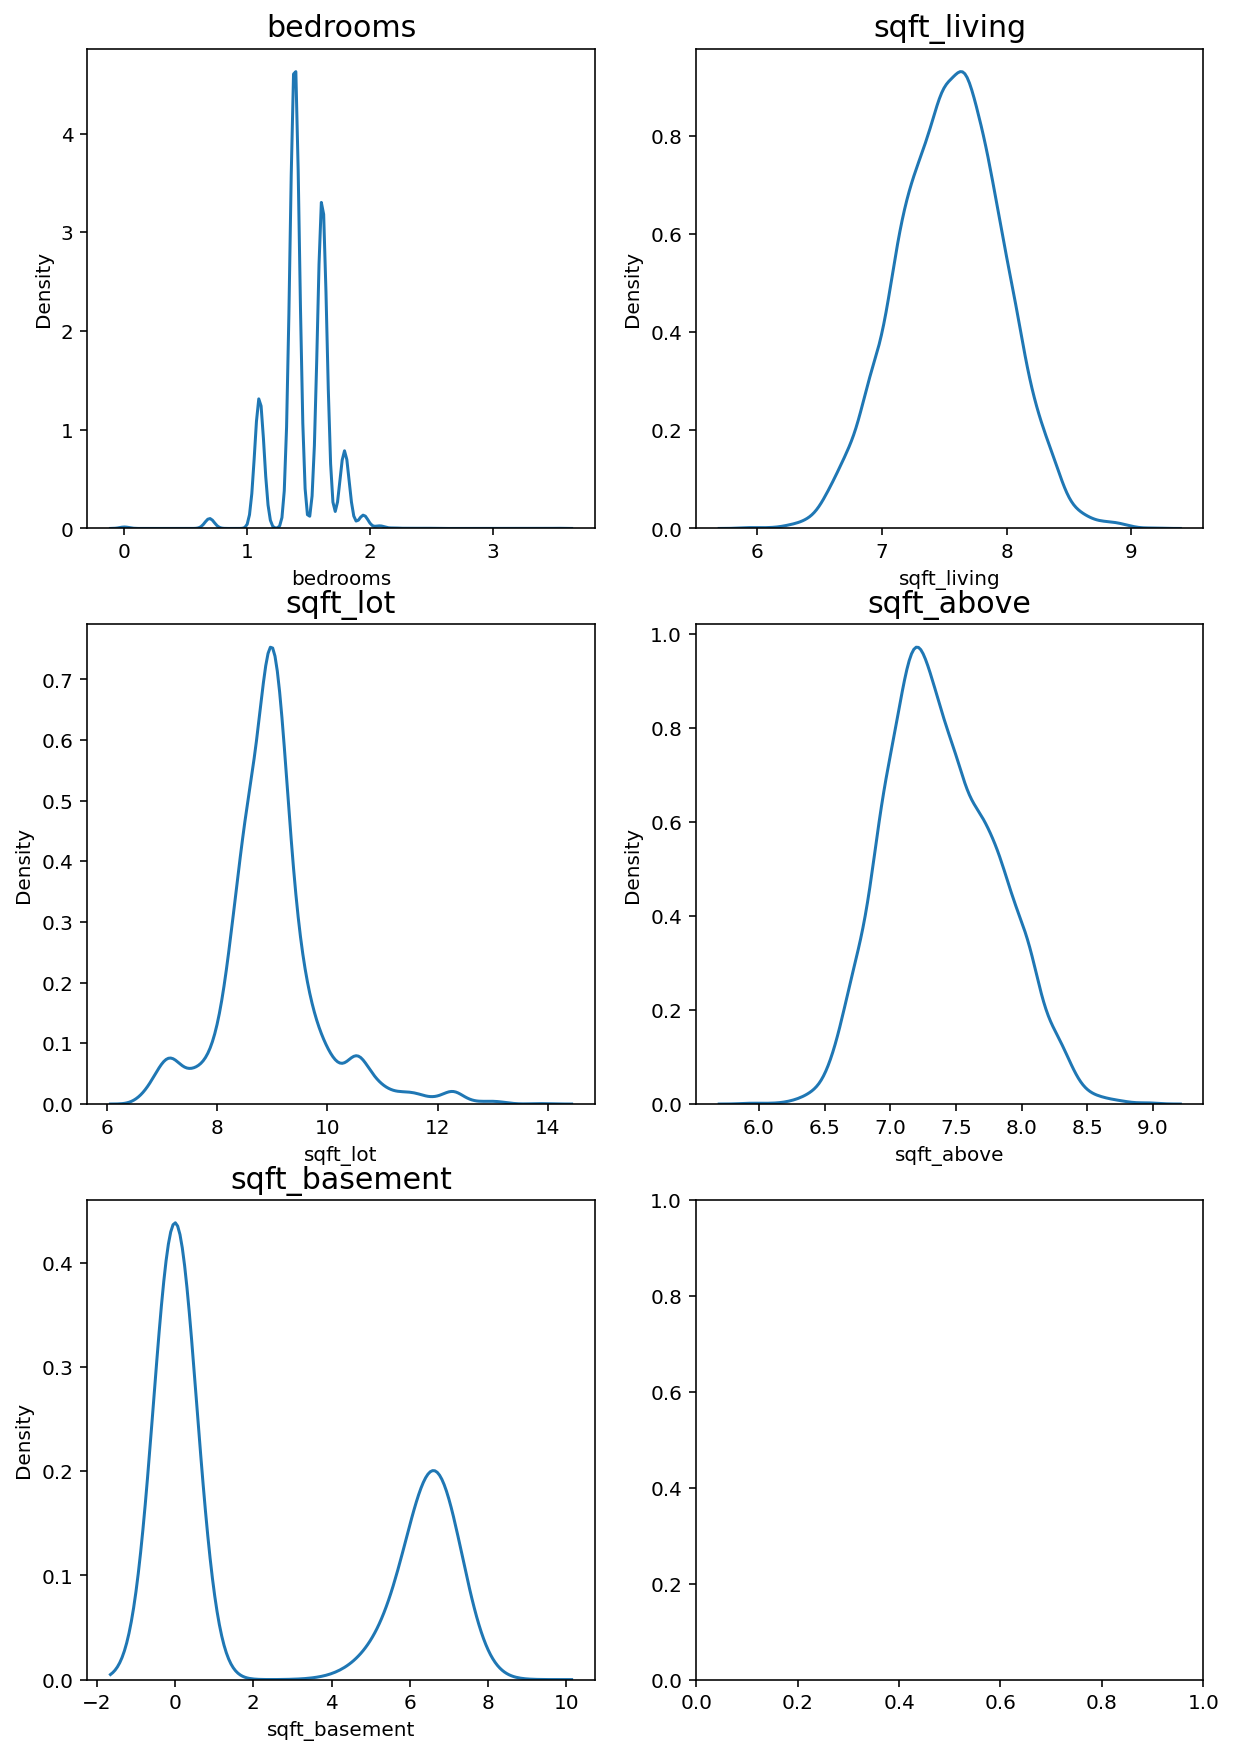

In [13]:
# Test 한쪽으로 치우쳤던 속성들에 대해서만 그래프로 분포 재확인
# 분포모양이 중앙을 집중으로 재분포됨

fig, ax = plt.subplots(3, 2, figsize=(10, 15))

count = 0
for row in range(3):
    for col in range(2):        
        sns.kdeplot(data=test[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count+=1
        if count == 5:
            break


## 3. 데이터 정제
### 불필요 데이터 삭제

In [14]:
# 데이터의 식별번호 속성 'id'삭제
del train['id']
print(train.columns)

del test['id']
print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [15]:
train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,1.386294,1.00,7.074117,8.639588,1.0,0,0,3,7,7.074117,0.0,1955,0,98178,47.5112,-122.257,7.201171,8.639588
1,201502,1.098612,1.00,6.647688,9.210440,1.0,0,0,3,6,6.647688,0.0,1933,0,98028,47.7379,-122.233,7.908755,8.995041
2,201502,1.386294,2.00,7.427144,8.997271,1.0,0,0,3,8,7.427144,0.0,1987,0,98074,47.6168,-122.045,7.496097,8.923191
3,201406,1.386294,2.25,7.447751,8.827615,2.0,0,0,3,7,7.447751,0.0,1995,0,98003,47.3097,-122.327,7.713785,8.827615
4,201501,1.386294,1.50,6.966967,9.181118,1.0,0,0,3,7,6.966967,0.0,1963,0,98198,47.4095,-122.315,7.409136,9.181118


<function matplotlib.pyplot.show(close=None, block=None)>

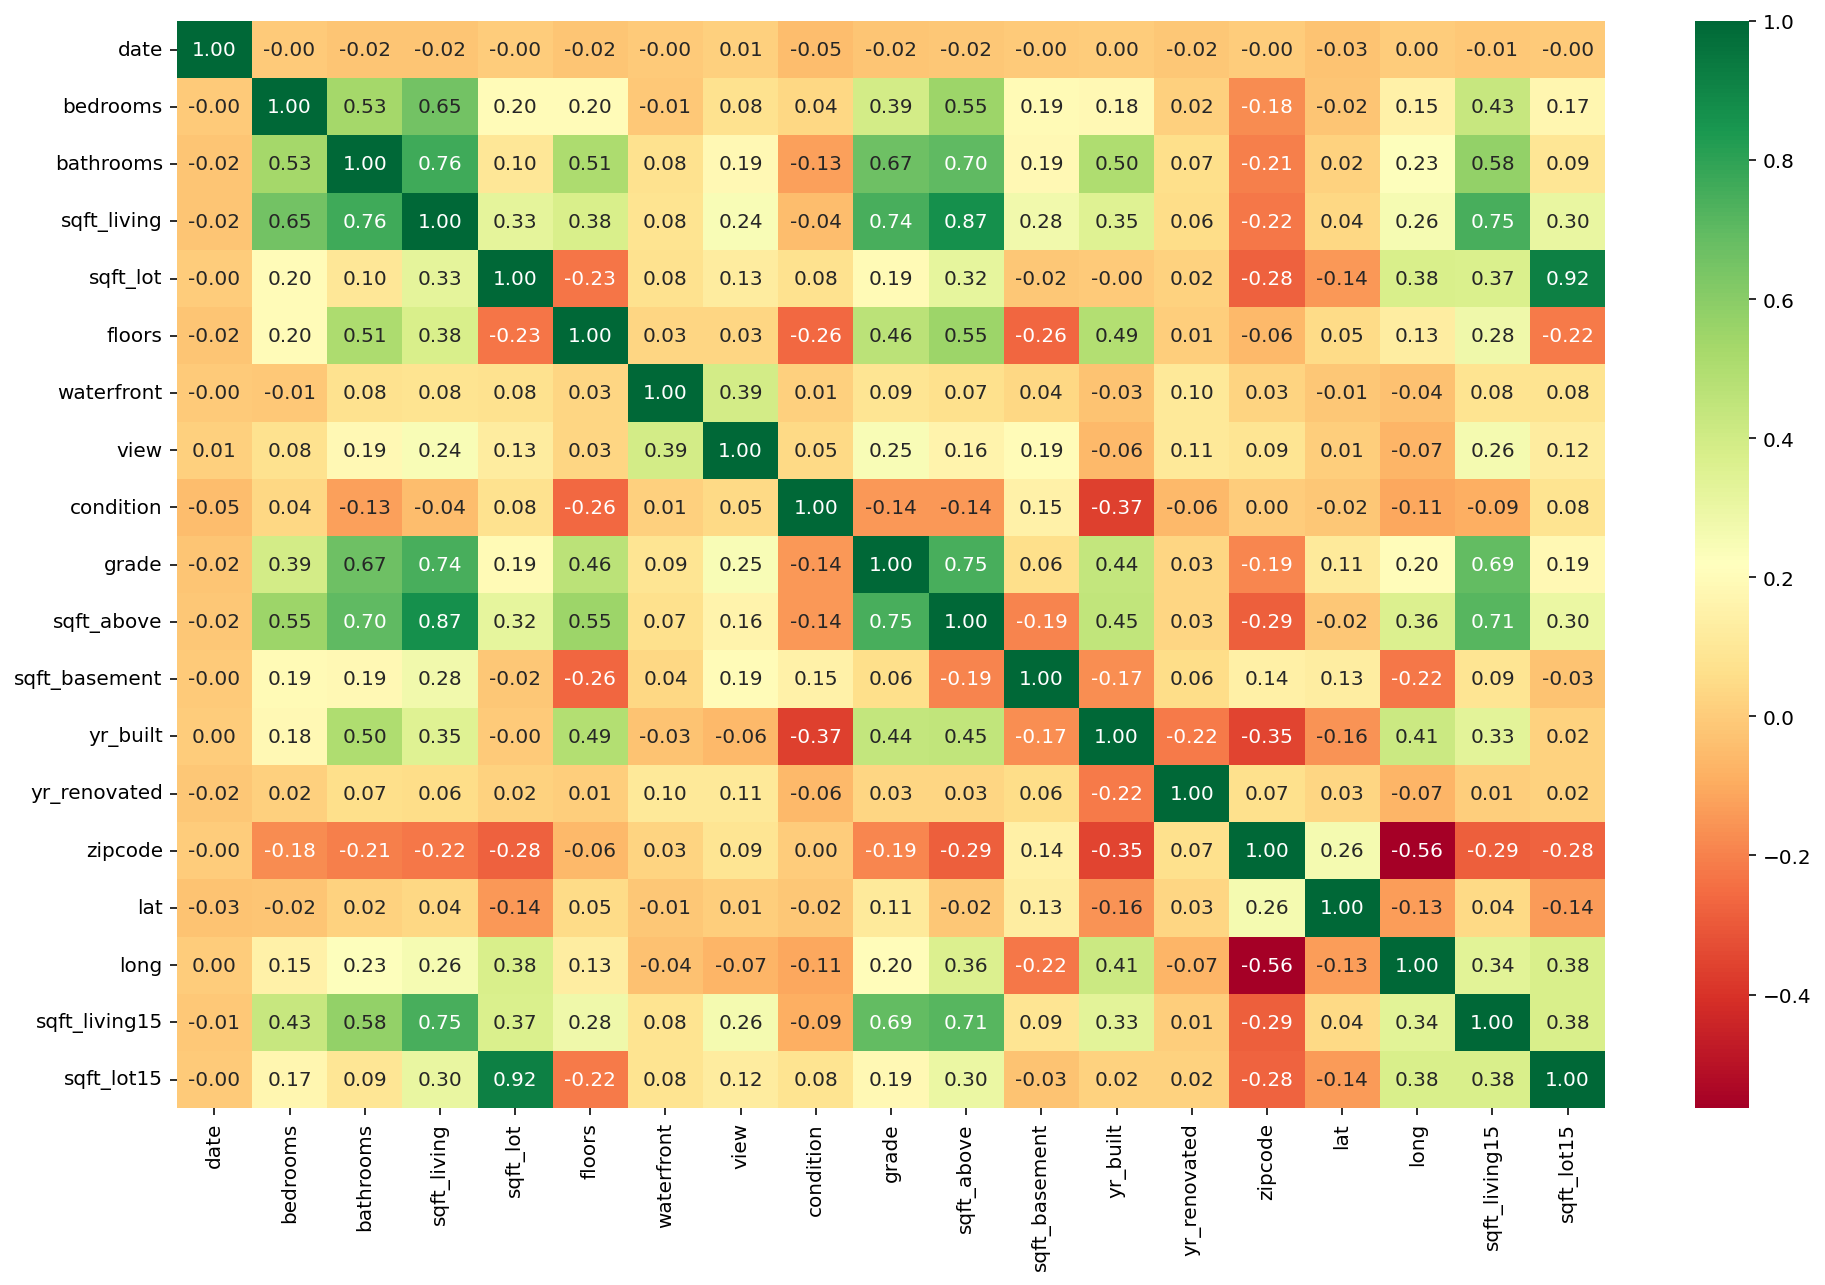

In [16]:
# Train 데이터 추가로 불필요한 속성 확인을 위해 히트맵을 활용하여 속성간의 상관관계 확인
corr = train.corr()
plt.figure(figsize=(16,10))

sns.heatmap(corr, cmap = 'RdYlGn', annot=True, fmt='.2f')
plt.show

# 히트맵을 통해 각 두변수들간의 상관관계를 살펴봄. 
# sqft_living(주거공간파트)속성이 grade속성, sqft_above(지하제외파트)속성, sqft_living15속성과 
# 각각 0.88, 0.76, 0,76으로 양의 상관관계가 강한편으로 나옴.
# sqft_living속성을 제외해도 sqft_above와 grade속성, sqft_living15속성이 대체해줄것으로 보임

In [17]:
# 히트맵 분석 결과로, sqrt_living 속성 삭제
del train['sqft_living']
print(train.columns)

del test['sqft_living']
print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')
Index(['date', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')


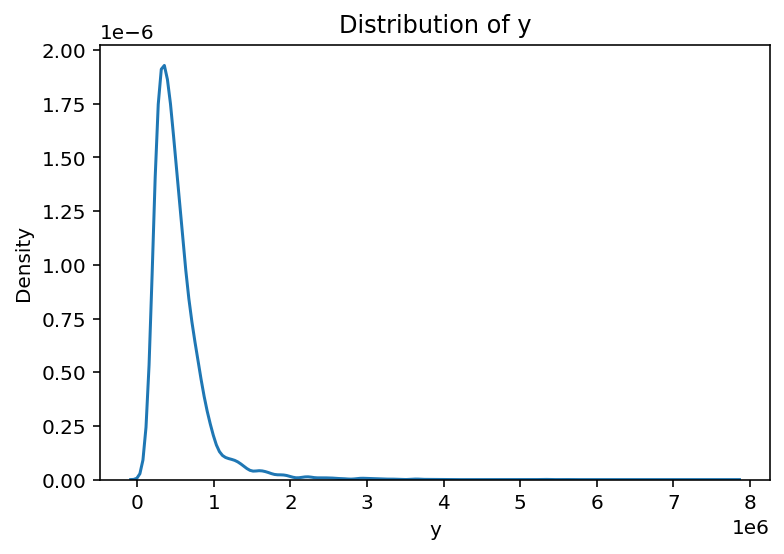

In [18]:
# Target데이터의 분포살펴보기

# KDE plot으로 y의 분포 시각화
sns.kdeplot(y)
plt.xlabel('y')
plt.ylabel('Density')
plt.title('Distribution of y')
plt.show()

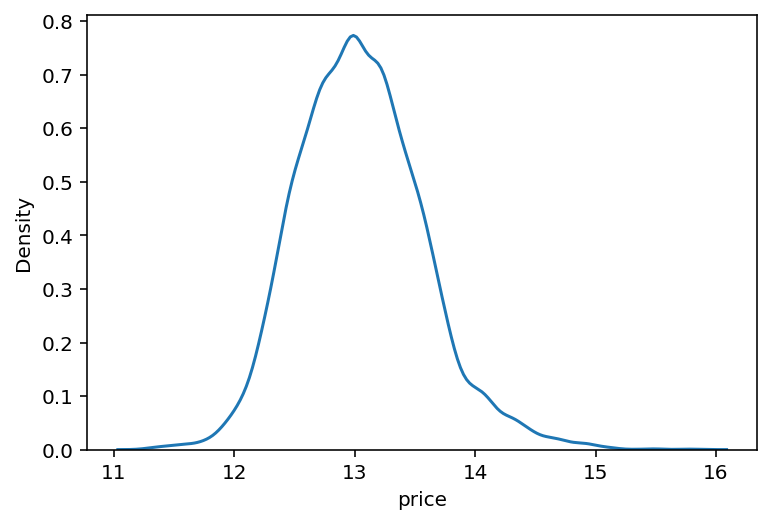

In [19]:
# np.log1p() 함수를 통해 로그 변환 
y = np.log1p(y)
y

sns.kdeplot(y)
plt.show()

## 4. 본격적인 트레이닝

In [20]:
# 반복되는 기능을 함수화

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))



In [21]:
# random_state는 모델초기화나 데이터셋 구성에 사용되는 랜덤 시드값. 
#random_state=None    # None 으로 설정하면, 모델 내부에서 임의로 선택  
random_state=2020

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

# 4가지 모델을 넣고, 각각을 비교함
models = [gboost, xgboost, lightgbm, rdforest]



In [23]:
def get_scores(models, train, y):

    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=42, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
        
       
            
    return score_df
get_scores(models, train, y)

# 분석결과 4가지 모델중 가장 성능이 좋은 것은 XGBRegressor (RMSE = 118712)이고, RandomForestRegressor (RMSE=140077) 임

,RMSE
RandomForestRegressor,140077.478446
GradientBoostingRegressor,129811.615315
LGBMRegressor,119989.899108
XGBRegressor,118712.611746


In [24]:
from sklearn.metrics import make_scorer

def rmsle(y_true, y_pred):
    """RMSLE를 계산하는 함수"""
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))

def my_GridSearch(model, x_train, y_train, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', 
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    grid_model.fit(x_train, y_train)
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    results = pd.DataFrame(params)
    results['score'] = score
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')
    return results



In [28]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


,max_depth,n_estimators,score,RMSLE
3,10,100,-0.027249,0.165072
2,10,50,-0.029736,0.172443
1,1,100,-0.058653,0.242184
0,1,50,-0.079212,0.281445


In [29]:
model = LGBMRegressor(max_depth=10, n_estimators=100, random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)
prediction

array([13.10889024, 12.98897454, 14.03666141, ..., 13.00713166,
       12.66339054, 12.96303527])

In [30]:
prediction = np.expm1(y)

prediction

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

In [31]:
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [32]:
save_submission(model, train, y, test, 'lgbm', rmsle='0.164399')

/aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.164399.csv saved!


In [46]:
# 앙상블 모델 학습 및 평가 함수
# 회귀분석으로 VotingRegressor활용하여 모델의 예측값 최종 예측, 평가는 R-square값과 RMSLE 사용

def train_and_evaluate_ensemble(train_data, target_data, test_size=0.2, random_state=42):
    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(train_data, target_data, test_size=test_size, random_state=random_state)

    # 개별 모델 초기화
    rdforest = RandomForestRegressor(random_state=random_state)
    gboost = GradientBoostingRegressor(random_state=random_state)
    xgboost = XGBRegressor(random_state=random_state)

    # 앙상블 모델 생성 (평균 기반)
    voting_reg = VotingRegressor(
        estimators=[('rf', rdforest), ('gb', gboost), ('xgb', xgboost)]
    )

       # 모델 학습
    voting_reg.fit(X_train, y_train)

    # 예측
    y_pred = voting_reg.predict(X_test)

    # R2 점수 계산
    r2_score = voting_reg.score(X_test, y_test)

    # RMSLE 점수 계산
    rmsle_score = rmsle(y_test, y_pred)
    
     
    
    
    return r2_score, rmsle_score


In [47]:
# 앙상블 모델 학습 및 평가 함수 호출
r2, rmsle = train_and_evaluate_ensemble(train, y)

# 결과 출력
print(f'앙상블 모델 R² 점수: {r2:.4f}')
print(f'RMSLE 점수: {rmsle:.4f}')

TypeError: 'numpy.float64' object is not callable

In [48]:
save_submission(model, train, y, test, 'ensemble', rmsle='0.0120')

/aiffel/aiffel/kaggle_kakr_housing/data/submission_ensemble_RMSLE_0.0120.csv saved!
